#### The exercise you are about to study is centered on walmart store analysis. It majorly analyze the profit of the store and tried to see the reason behind the loss that were incur. Which product type i.e. Segment, Sub-Category etc. do really have the highest or more loss thn the others. In order to get better insight and see how thing or decision could be made to better improve the profit generation of the store transactions. These and many more were the thing done I hope you enjoy as you go through it.

# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Load Your Data

In [2]:
walmart_df = pd.read_excel("Walmart-Superstore.xls")

# Examine the table

In [3]:
walmart_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,9976,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-PA-10000743,Office Supplies,Paper,Xerox 1977,13.360,2,0.0,6.4128
1,9977,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,TEC-PH-10002496,Technology,Phones,Cisco SPA301,249.584,2,0.2,31.1980
2,9978,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-FA-10003467,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.860,7,0.0,0.0000
3,9979,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,13.376,4,0.2,4.6816
4,9980,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-BI-10002026,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,437.472,14,0.2,153.1152


# Data exploration 

In [4]:
walmart_df.shape

(9994, 21)

#### We could see that the columns consist of object types majorly. This gives us a clue of what kind of variables we would be working with that are int and datatime data types. which are fewer compared to object data type.

In [5]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
walmart_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,5016.463878,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.101298,32063.693350,623.245101,2.225110,0.206452,234.260108
min,20.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2518.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,5016.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7514.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### Lookng at the table and its contents, it shows us that statistical properties that walmart store data consists. Especially that int data type of the column features.

### Numerial analysis and visualization

In [7]:
walmart_df["Sales"].mean()

229.8580008304936

In [8]:
walmart_df["Sales"].std()

623.2451005086818

In [9]:
walmart_df["Discount"].mean()

0.15620272163298934

In [10]:
walmart_df["Discount"].std()

0.2064519678256986

In [11]:
walmart_df["Profit"].mean()

28.6568963077848

In [12]:
walmart_df["Discount"].std()

0.2064519678256986

In [13]:
walmart_df["Quantity"].mean()

3.789573744246548

In [14]:
walmart_df["Quantity"].std()

2.2251096911414274

In [15]:
walmart_df["Profit"].std()

234.2601076909576

#### We checked for the mean and standard deviatiation of the some key statistcal variables, such as sales, profit, quantity ... Just to view their numerical figureat a glance

In [16]:
walmart_df["Profit"].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

#### We used the describe function to overview the statistical properties of "Profit" variable in the table.


In [17]:
walmart_df["Profit"].median()

8.666499999999996

### Okay! now is the time for the visualization of data, and we begin with Profit, using a boxplot to visualize it property 

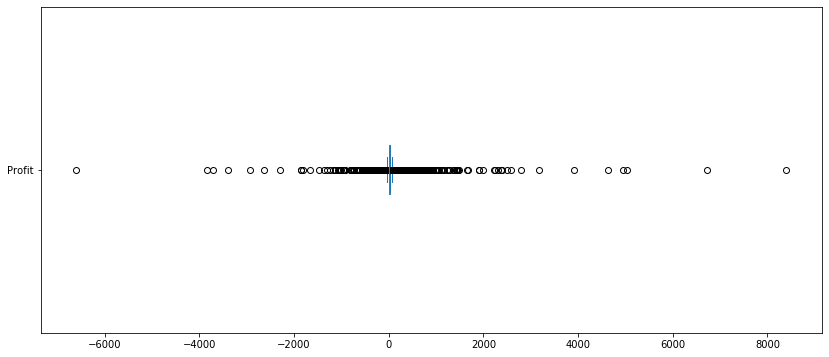

In [18]:
walmart_df["Profit"].plot(kind="box", vert=False, figsize=(14, 6))

#### From the above visualizaton, we could see that that are outliers both at the positive and negatives ends of the line along the horizontal axis

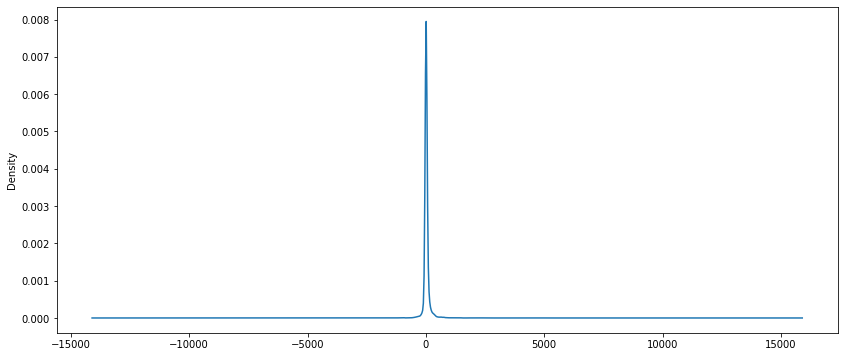

In [19]:
walmart_df["Profit"].plot(kind="density", figsize=(14, 6))

Text(0.5, 0, 'Dollars')

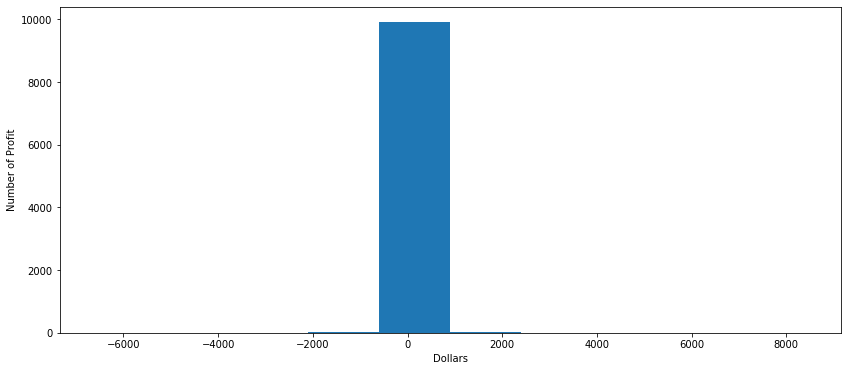

In [20]:
ax = walmart_df['Profit'].plot(kind="hist", figsize=(14,6))
ax.set_ylabel("Number of Profit")
ax.set_xlabel("Dollars")

#### The above visualization display the same as the previous, just that the kind of display is different. The latter makes use of histogram

(Office Supplies    6026
 Furniture          2121
 Technology         1847
 Name: Category, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c427e645c8>)

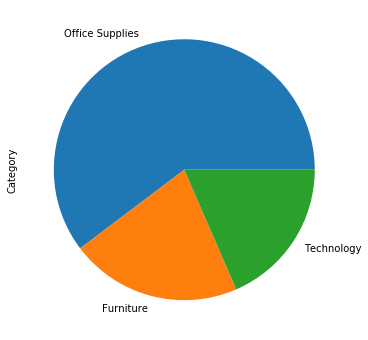

In [21]:
walmart_df["Category"].value_counts(), walmart_df["Category"].value_counts().plot(kind="pie", figsize=(6,6))

#### The above visualization was done to show the proportion of the categorical variable under column feature called "Category" we could see that subtype under that very same column appears to be the one with the largest proportion.

In [22]:
walmart_df["Sub-Category"].value_counts(),

(Binders        1523
 Paper          1370
 Furnishings     957
 Phones          889
 Storage         846
 Art             796
 Accessories     775
 Chairs          617
 Appliances      466
 Labels          364
 Tables          319
 Envelopes       254
 Bookcases       228
 Fasteners       217
 Supplies        190
 Machines        115
 Copiers          68
 Name: Sub-Category, dtype: int64,)

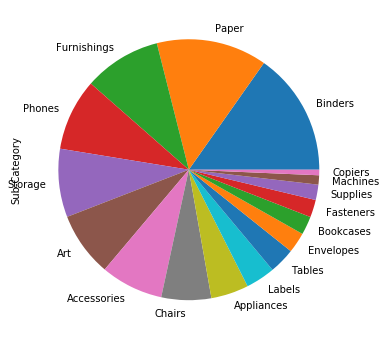

In [23]:
 walmart_df["Sub-Category"].value_counts().plot(kind="pie", figsize=(6,6))

#### The same thing is beng replicate here, we use a particular column, "Sub-Category" for the display of the products under itself and view the proportion of each of them how large or how small they are.

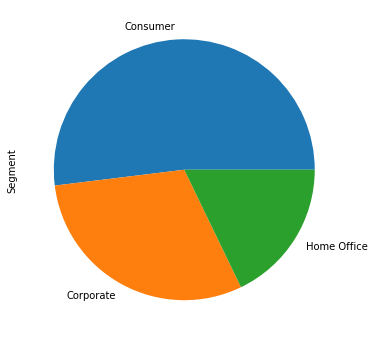

In [24]:
walmart_df["Segment"].value_counts().plot(kind="pie", figsize=(6, 6))

In [25]:
walmart_df["Segment"].value_counts()


Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

#### Let's view the structure of a column "Segment" and see the eight of each of them using histogram

#### From the above visualization we could tell that Consumer, a subtype of the variable under watch was the largest by occupying the highest space in the walmart store data 

#### We would like to see the correlation table table of the columns that are have statistical propertes

In [26]:
corr = walmart_df.corr()
corr

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.013268,0.000063,-0.003395,0.014288,0.012025
Postal Code,0.013268,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,0.000063,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.003395,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.014288,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012025,-0.029961,0.479064,0.066253,-0.219487,1.000000


#### So from the above table you could see that the mostly weak relationship among the variable under investigation. The only relationship that seems to be a bit high was between Proft and Sales. Still it shows a sort of weak relationship.

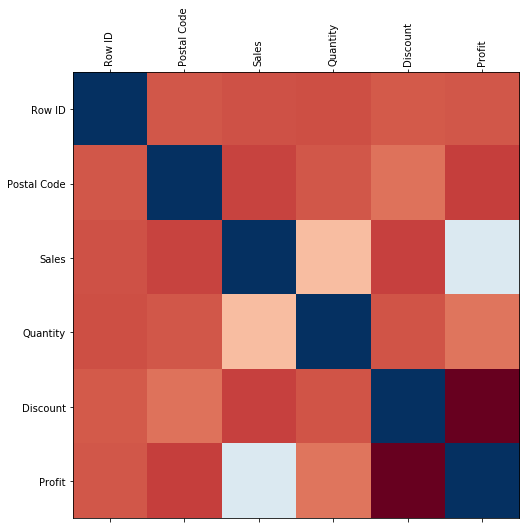

In [27]:
fig = plt.figure(figsize=(12, 8))
plt.matshow(corr, cmap="RdBu", fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns, rotation="vertical");
plt.yticks(range(len(corr.columns)), corr.columns);

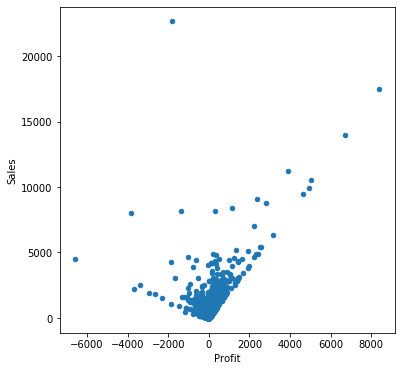

In [28]:
walmart_df.plot(kind="scatter", x="Profit", y="Sales", figsize=(6,6))

#### Then we want to use scatter graph to show relationships between two varables

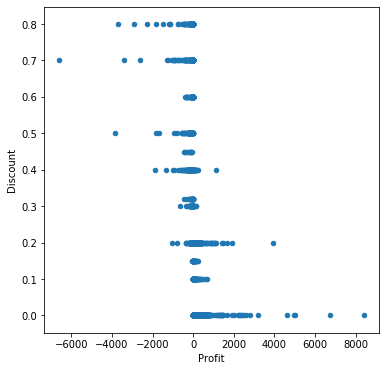

In [29]:
walmart_df.plot(kind="scatter", x="Profit", y="Discount", figsize=(6,6))

##### From the above graph we could tell that clearly their is a negative relation between "Profit" and "Discount". The higher the increase in the number of discount being given the lesser the profit, the store gien will get from each product sold and higher the chance of running into loss.

##### We use boxplot to do the same analysis, checking the relationship between two variables but more importantly lookng out for outliers  

C:\anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


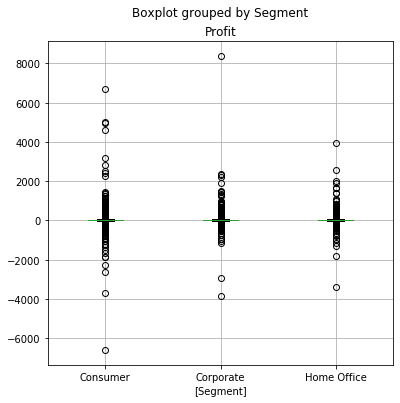

In [30]:
ax=walmart_df[["Profit", "Segment"]].boxplot(by="Segment", figsize=(6, 6))
ax.set_label("Segment")

##### Also in the like manner of the previous analysis, we use boxplot to check for the relationships, with the interest of knowing the rate of profit on each product undersub-category. And as well looking the outliers  variances in each of the product category.

C:\anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


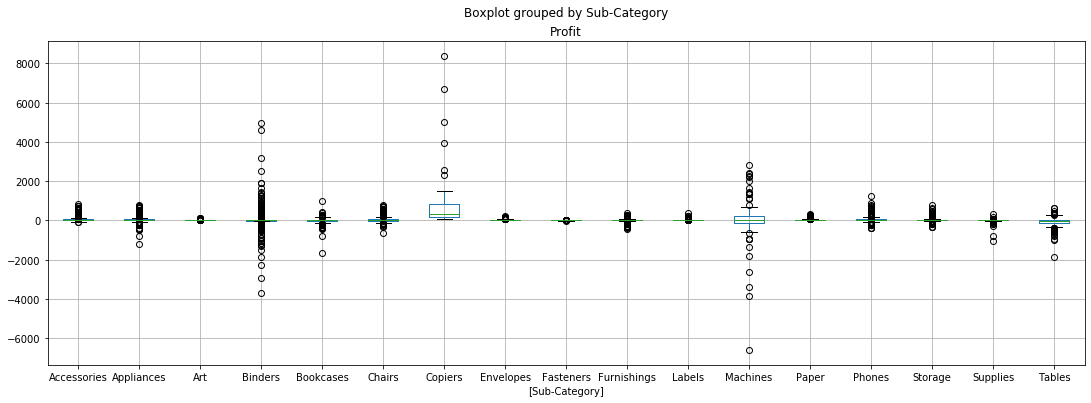

In [31]:
ax=walmart_df[["Profit", "Sub-Category"]].boxplot(by="Sub-Category", figsize=(18, 6))
ax.set_label("Sub-Category")

C:\anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


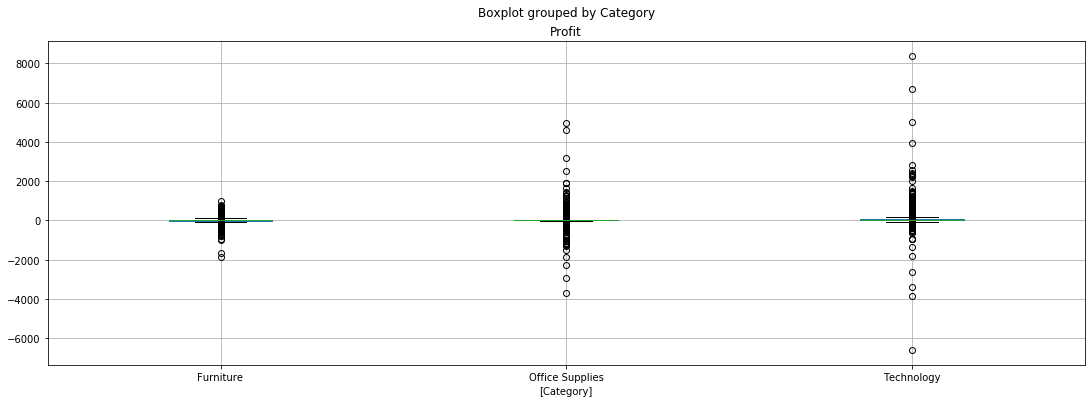

In [32]:
ax=walmart_df[["Profit", "Category"]].boxplot(by="Category", figsize=(18, 6))
ax.set_label("Category")

##### Using boxplot visualiization to check for outliers in Profit, Sales, Quantity, Discount and Segment.

Profit         AxesSubplot(0.125,0.536818;0.352273x0.343182)
Sales       AxesSubplot(0.547727,0.536818;0.352273x0.343182)
Quantity          AxesSubplot(0.125,0.125;0.352273x0.343182)
Discount       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

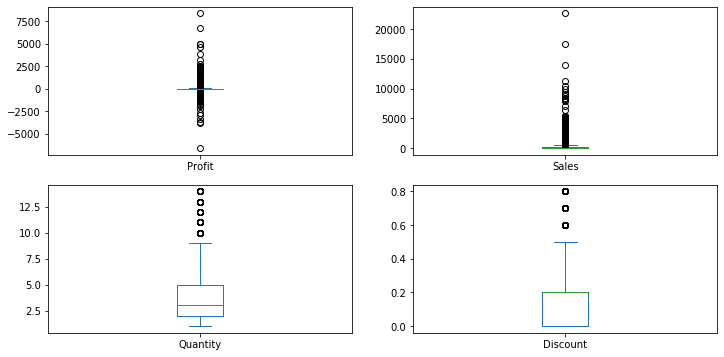

In [33]:
boxplot_cols = ["Profit", "Sales", "Quantity", "Discount", "Segment"]

walmart_df[boxplot_cols].plot(kind="box", subplots=True, layout=(2, 2), figsize=(12,6))

In [34]:
walmart_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,9976,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-PA-10000743,Office Supplies,Paper,Xerox 1977,13.360,2,0.0,6.4128
1,9977,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,TEC-PH-10002496,Technology,Phones,Cisco SPA301,249.584,2,0.2,31.1980
2,9978,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-FA-10003467,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.860,7,0.0,0.0000
3,9979,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,13.376,4,0.2,4.6816
4,9980,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032,West,OFF-BI-10002026,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,437.472,14,0.2,153.1152


##### Join columns to form a single single and checking for the statistical properties as well as visualizing them.

In [35]:
walmart_df["Profit_per_quantity"] = walmart_df["Profit"] / walmart_df["Quantity"]

In [36]:
walmart_df["Profit_per_quantity"].head()

0     3.2064
1    15.5990
2     0.0000
3     1.1704
4    10.9368
Name: Profit_per_quantity, dtype: float64

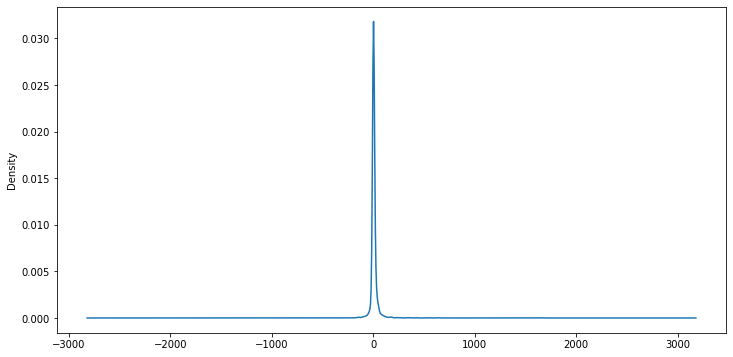

In [37]:
walmart_df["Profit_per_quantity"].plot(kind="density", figsize=(12,6))

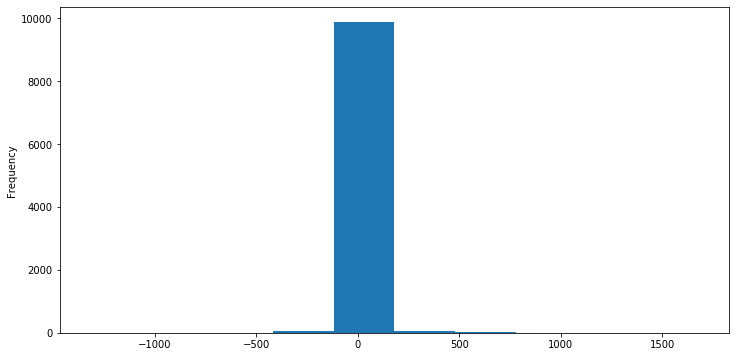

In [38]:
walmart_df["Profit_per_quantity"].plot(kind="hist", figsize=(12,6))

In [39]:
walmart_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Profit_per_quantity
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,5016.463878,55190.379428,229.858001,3.789574,0.156203,28.656896,7.799372
std,2885.101298,32063.693350,623.245101,2.225110,0.206452,234.260108,56.074974
min,20.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,-1319.995600
25%,2518.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,0.722800
50%,5016.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,2.767000
75%,7514.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,8.703200
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,1679.995200


In [40]:
walmart_df["Quantity_per_Sales"] = walmart_df["Quantity"] / walmart_df["Sales"]
walmart_df["Quantity_per_Sales"]

0       0.149701
1       0.008013
2       0.505051
3       0.299043
4       0.032002
          ...   
9989    0.072664
9990    1.179245
9991    0.009011
9992    0.036036
9993    0.233645
Name: Quantity_per_Sales, Length: 9994, dtype: float64

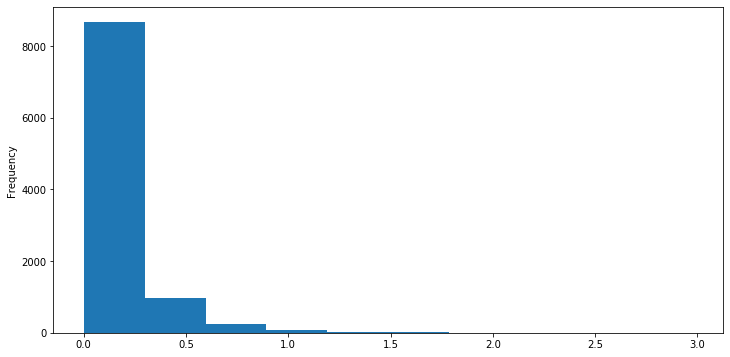

In [41]:
walmart_df["Quantity_per_Sales"].plot(kind="hist", figsize=(12,6))

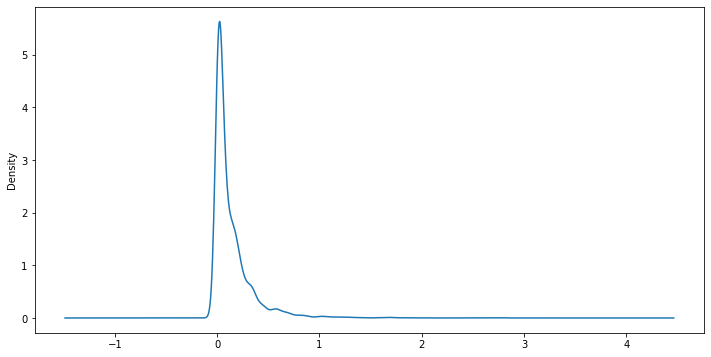

In [42]:
walmart_df["Quantity_per_Sales"].plot(kind="density", figsize=(12,6))

In [43]:
walmart_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit_per_quantity,Quantity_per_Sales
0,9976,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,OFF-PA-10000743,Office Supplies,Paper,Xerox 1977,13.360,2,0.0,6.4128,3.2064,0.149701
1,9977,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,TEC-PH-10002496,Technology,Phones,Cisco SPA301,249.584,2,0.2,31.1980,15.5990,0.008013
2,9978,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,OFF-FA-10003467,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.860,7,0.0,0.0000,0.0000,0.505051
3,9979,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,13.376,4,0.2,4.6816,1.1704,0.299043
4,9980,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,OFF-BI-10002026,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,437.472,14,0.2,153.1152,10.9368,0.032002


In [44]:
walmart_df["Price_per_Product"] = walmart_df["Sales"] / walmart_df["Quantity"]

walmart_df["Price_per_Product"]

0         6.680
1       124.792
2         1.980
3         3.344
4        31.248
         ...   
9989     13.762
9990      0.848
9991    110.980
9992     27.750
9993      4.280
Name: Price_per_Product, Length: 9994, dtype: float64

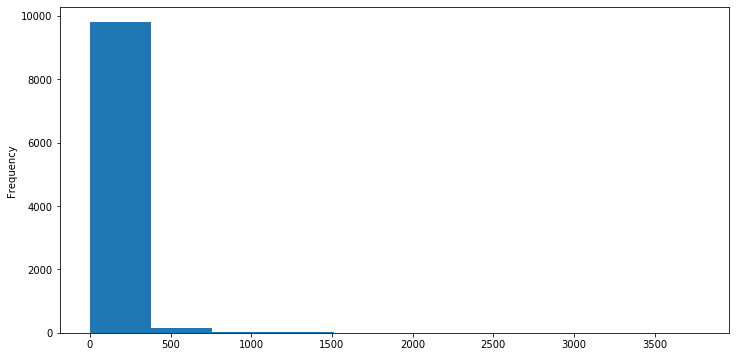

In [45]:
walmart_df["Price_per_Product"].plot(kind="hist", figsize=(12,6))

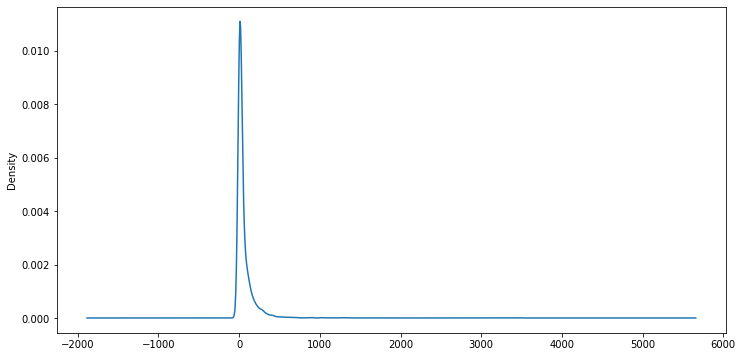

In [46]:
walmart_df["Price_per_Product"].plot(kind="density", figsize=(12,6))

In [47]:
walmart_df["Profit_by_Sales"] = walmart_df["Profit"] / walmart_df["Sales"]
walmart_df["Profit_by_Sales"]

0       0.480
1       0.125
2       0.000
3       0.350
4       0.350
        ...  
9989   -1.800
9990   -1.500
9991    0.020
9992    0.180
9993    0.290
Name: Profit_by_Sales, Length: 9994, dtype: float64

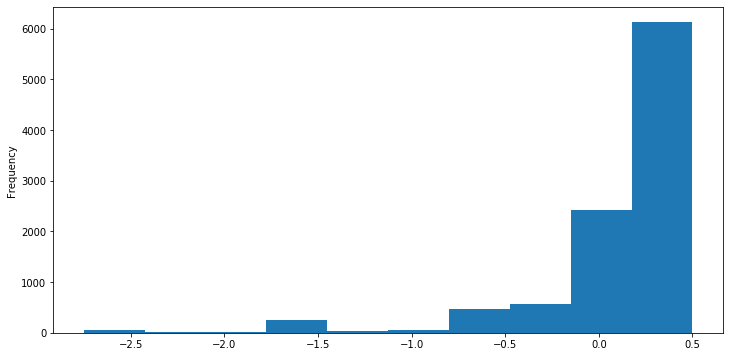

In [48]:
walmart_df["Profit_by_Sales"].plot(kind="hist", figsize=(12,6))

#### Check the outliers and where they fall into, towards the negative part of the graph

C:\anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


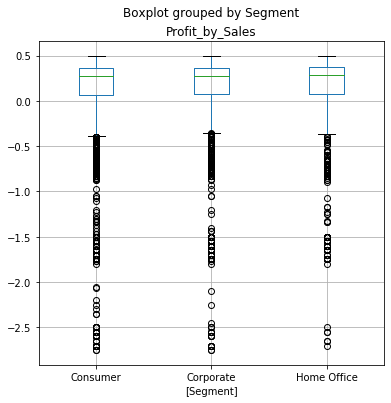

In [49]:
ax=walmart_df[["Profit_by_Sales", "Segment"]].boxplot(by="Segment", figsize=(6, 6))
ax.set_label("Segment")

C:\anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


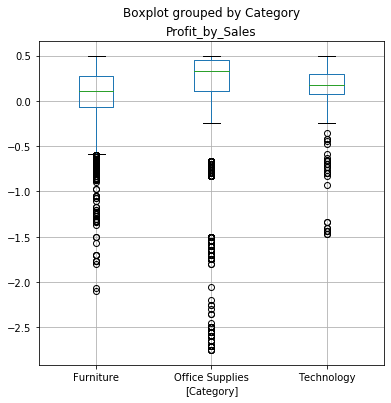

In [50]:
ax=walmart_df[["Profit_by_Sales", "Category"]].boxplot(by="Category", figsize=(6, 6))
ax.set_label("Category")

C:\anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


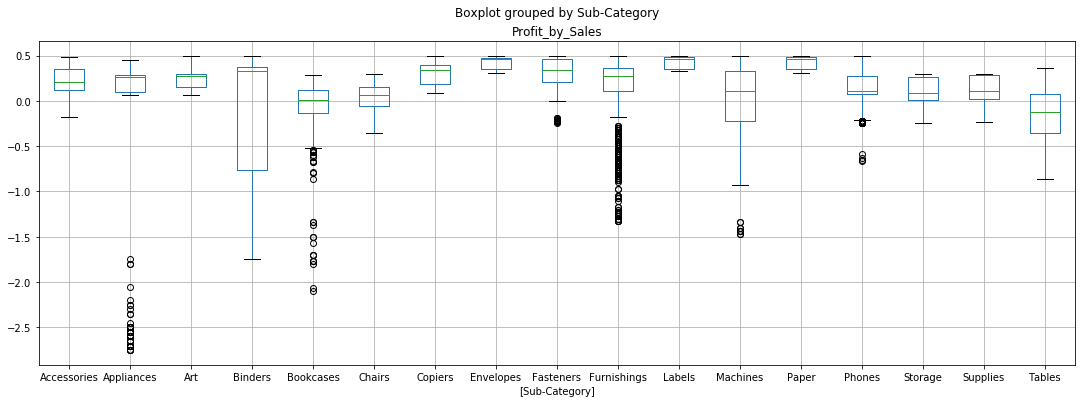

In [51]:
ax=walmart_df[["Profit_by_Sales", "Sub-Category"]].boxplot(by="Sub-Category", figsize=(18, 6))
ax.set_label("Sub-Category")

In [52]:
walmart_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit_per_quantity,Quantity_per_Sales,Price_per_Product,Profit_by_Sales
0,9976,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,Paper,Xerox 1977,13.360,2,0.0,6.4128,3.2064,0.149701,6.680,0.480
1,9977,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,Phones,Cisco SPA301,249.584,2,0.2,31.1980,15.5990,0.008013,124.792,0.125
2,9978,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.860,7,0.0,0.0000,0.0000,0.505051,1.980,0.000
3,9979,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,Binders,Avery Durable Slant Ring Binders With Label Ho...,13.376,4,0.2,4.6816,1.1704,0.299043,3.344,0.350
4,9980,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,Binders,Ibico Recycled Linen-Style Covers,437.472,14,0.2,153.1152,10.9368,0.032002,31.248,0.350


##### Columns join by multiplication

In [53]:
walmart_df["Calculated Profit"] = walmart_df["Profit"] * walmart_df["Quantity"]
walmart_df["Calculated Profit"]

0         12.8256
1         62.3960
2          0.0000
3         18.7264
4       2143.6128
          ...    
9989    -619.2900
9990     -11.4480
9991      79.9056
9992      19.9800
9993       4.9648
Name: Calculated Profit, Length: 9994, dtype: float64

In [54]:
walmart_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Profit_per_quantity,Quantity_per_Sales,Price_per_Product,Profit_by_Sales,Calculated Profit
0,9976,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,Xerox 1977,13.360,2,0.0,6.4128,3.2064,0.149701,6.680,0.480,12.8256
1,9977,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,Cisco SPA301,249.584,2,0.2,31.1980,15.5990,0.008013,124.792,0.125,62.3960
2,9978,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,"Alliance Big Bands Rubber Bands, 12/Pack",13.860,7,0.0,0.0000,0.0000,0.505051,1.980,0.000,0.0000
3,9979,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,Avery Durable Slant Ring Binders With Label Ho...,13.376,4,0.2,4.6816,1.1704,0.299043,3.344,0.350,18.7264
4,9980,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,Ibico Recycled Linen-Style Covers,437.472,14,0.2,153.1152,10.9368,0.032002,31.248,0.350,2143.6128


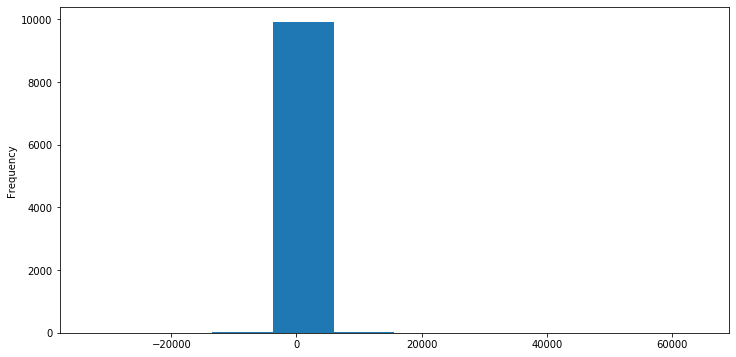

In [55]:
walmart_df["Calculated Profit"].plot(kind="hist", figsize=(12,6))

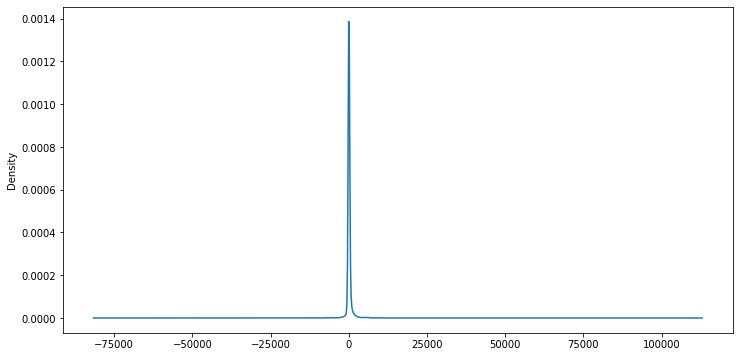

In [56]:
walmart_df["Calculated Profit"].plot(kind="density", figsize=(12,6))

##### We look for the total sales in the whole transactions.

In [57]:
(walmart_df["Sales"] != walmart_df["Profit"]).sum()

9994

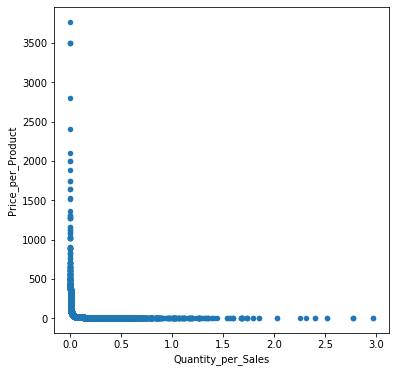

In [58]:
walmart_df.plot(kind="scatter", x="Quantity_per_Sales", y="Price_per_Product", figsize=(6,6))

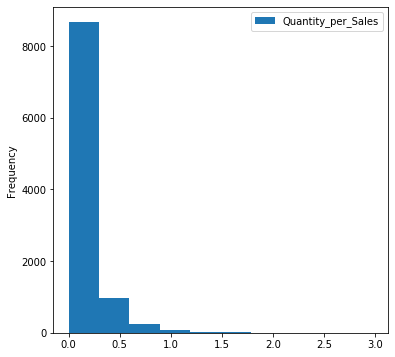

In [59]:
walmart_df.plot(kind="hist", x="Price_per_Product", y="Quantity_per_Sales", figsize=(6,6))

###### We join Sales' and Profit columns together and assign them to an object called "Cost_of_Product"

In [60]:
walmart_df["Cost_of_Product"] = walmart_df["Sales"] - walmart_df["Profit"]

walmart_df["Cost_of_Product"]

0         6.9472
1       218.3860
2        13.8600
3         8.6944
4       284.3568
          ...   
9989    192.6680
9990      6.3600
9991    652.5624
9992     45.5100
9993      6.0776
Name: Cost_of_Product, Length: 9994, dtype: float64

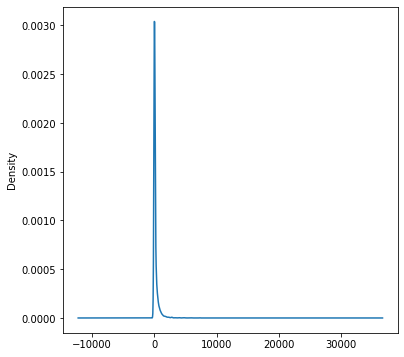

In [61]:
walmart_df["Cost_of_Product"].plot(kind="density", figsize=(6,6))

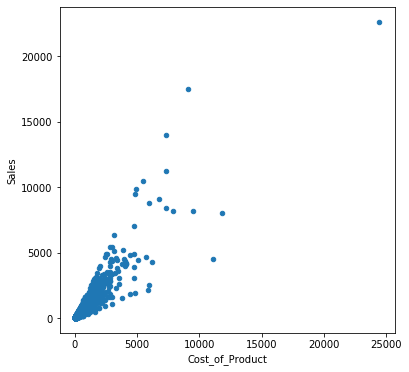

In [62]:
walmart_df.plot(kind="scatter", x="Cost_of_Product", y="Sales", figsize=(6, 6))

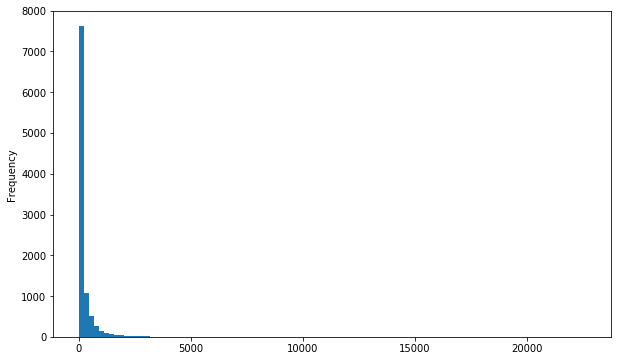

In [63]:
walmart_df["Sales"].plot(kind="hist", bins=100, figsize=(10,6))

#### Still in the act of doing some arithmetics, we tried to subtract 100 from each "Cost_of_Product" column and check for the outcome

In [64]:
walmart_df["Cost_of_Product"] -= 100
walmart_df["Cost_of_Product"]

0       -93.0528
1       118.3860
2       -86.1400
3       -91.3056
4       184.3568
          ...   
9989     92.6680
9990    -93.6400
9991    552.5624
9992    -54.4900
9993    -93.9224
Name: Cost_of_Product, Length: 9994, dtype: float64

In [65]:
walmart_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Profit_per_quantity,Quantity_per_Sales,Price_per_Product,Profit_by_Sales,Calculated Profit,Cost_of_Product
0,9976,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,13.360,2,0.0,6.4128,3.2064,0.149701,6.680,0.480,12.8256,-93.0528
1,9977,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,249.584,2,0.2,31.1980,15.5990,0.008013,124.792,0.125,62.3960,118.3860
2,9978,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,13.860,7,0.0,0.0000,0.0000,0.505051,1.980,0.000,0.0000,-86.1400
3,9979,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,13.376,4,0.2,4.6816,1.1704,0.299043,3.344,0.350,18.7264,-91.3056
4,9980,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,437.472,14,0.2,153.1152,10.9368,0.032002,31.248,0.350,2143.6128,184.3568


#### So we want to see only the transaction record of the "City" in "los Angelis".

In [66]:
walmart_df.loc[walmart_df["City"] == "Los Angeles"]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Profit_per_quantity,Quantity_per_Sales,Price_per_Product,Profit_by_Sales,Calculated Profit,Cost_of_Product
0,9976,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,13.360,2,0.0,6.4128,3.2064,0.149701,6.680,0.4800,12.8256,-93.0528
1,9977,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,249.584,2,0.2,31.1980,15.5990,0.008013,124.792,0.1250,62.3960,118.3860
2,9978,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,13.860,7,0.0,0.0000,0.0000,0.505051,1.980,0.0000,0.0000,-86.1400
3,9979,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,13.376,4,0.2,4.6816,1.1704,0.299043,3.344,0.3500,18.7264,-91.3056
4,9980,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,437.472,14,0.2,153.1152,10.9368,0.032002,31.248,0.3500,2143.6128,184.3568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,907.152,6,0.2,90.7152,15.1192,0.006614,151.192,0.1000,544.2912,716.4368
9983,9984,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,18.504,3,0.2,5.7825,1.9275,0.162127,6.168,0.3125,17.3475,-87.2785
9984,9985,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,114.900,5,0.0,34.4700,6.8940,0.043516,22.980,0.3000,172.3500,-19.5700
9985,9986,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,1706.184,9,0.2,85.3092,9.4788,0.005275,189.576,0.0500,767.7828,1520.8748


#### Checkout for the numbers of the value in each of the city under column "City".

In [67]:
walmart_df["City"].value_counts()

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

#### Just as we did for los angelis, we want to do same for New York.

In [68]:
walmart_df.loc[walmart_df["State"] == "New York"]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Profit_per_quantity,Quantity_per_Sales,Price_per_Product,Profit_by_Sales,Calculated Profit,Cost_of_Product
9,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,31.50,10,0.0,15.1200,1.5120,0.317460,3.15,0.48,151.2000,-83.6200
10,9986,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,55.60,4,0.0,16.1240,4.0310,0.071942,13.90,0.29,64.4960,-60.5240
53,54,CA-2016-105816,2016-12-11,2016-12-17,Standard Class,JM-15265,Janet Molinari,Corporate,United States,New York City,...,15.26,7,0.0,6.2566,0.8938,0.458716,2.18,0.41,43.7962,-90.9966
54,55,CA-2016-105816,2016-12-11,2016-12-17,Standard Class,JM-15265,Janet Molinari,Corporate,United States,New York City,...,1029.95,5,0.0,298.6855,59.7371,0.004855,205.99,0.29,1493.4275,631.2645
55,56,CA-2016-111682,2016-06-17,2016-06-18,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,208.56,6,0.0,52.1400,8.6900,0.028769,34.76,0.25,312.8400,56.4200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9939,9940,CA-2016-169824,2016-12-12,2016-12-17,Standard Class,NS-18640,Noel Staavos,Corporate,United States,New York City,...,35.52,4,0.0,9.9456,2.4864,0.112613,8.88,0.28,39.7824,-74.4256
9940,9941,CA-2016-169824,2016-12-12,2016-12-17,Standard Class,NS-18640,Noel Staavos,Corporate,United States,New York City,...,11.20,7,0.0,4.8160,0.6880,0.625000,1.60,0.43,33.7120,-93.6160
9956,9957,US-2014-143287,2014-11-11,2014-11-17,Standard Class,KN-16705,Kristina Nunn,Home Office,United States,New Rochelle,...,46.35,5,0.0,21.7845,4.3569,0.107875,9.27,0.47,108.9225,-75.4345
9957,9958,US-2014-143287,2014-11-11,2014-11-17,Standard Class,KN-16705,Kristina Nunn,Home Office,United States,New Rochelle,...,223.92,4,0.0,109.7208,27.4302,0.017864,55.98,0.49,438.8832,14.1992


In [69]:
walmart_df.loc[walmart_df["Segment"] == "Consumer"]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Profit_per_quantity,Quantity_per_Sales,Price_per_Product,Profit_by_Sales,Calculated Profit,Cost_of_Product
5,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,85.980,1,0.0,22.3548,22.3548,0.011631,85.980,0.260,22.3548,-36.3748
6,9982,CA-2017-163566,2017-08-03,2017-08-06,First Class,TB-21055,Ted Butterfield,Consumer,United States,Fairfield,...,16.520,5,0.2,5.3690,1.0738,0.302663,3.304,0.325,26.8450,-88.8490
7,9983,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,35.560,7,0.0,16.7132,2.3876,0.196850,5.080,0.470,116.9924,-81.1532
8,9984,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,97.980,2,0.0,27.4344,13.7172,0.020412,48.990,0.280,54.8688,-29.4544
9,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,31.500,10,0.0,15.1200,1.5120,0.317460,3.150,0.480,151.2000,-83.6200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,9988,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,15.552,3,0.2,5.4432,1.8144,0.192901,5.184,0.350,16.3296,-89.8912
9988,9989,CA-2016-161389,2016-12-05,2016-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,407.976,3,0.2,132.5922,44.1974,0.007353,135.992,0.325,397.7766,175.3838
9991,9992,CA-2014-105893,2014-11-11,2014-11-18,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,...,665.880,6,0.0,13.3176,2.2196,0.009011,110.980,0.020,79.9056,552.5624
9992,9993,CA-2014-167164,2014-05-13,2014-05-15,Second Class,AG-10270,Alejandro Grove,Consumer,United States,West Jordan,...,55.500,2,0.0,9.9900,4.9950,0.036036,27.750,0.180,19.9800,-54.4900


In [70]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Row ID               9994 non-null   int64         
 1   Order ID             9994 non-null   object        
 2   Order Date           9994 non-null   datetime64[ns]
 3   Ship Date            9994 non-null   datetime64[ns]
 4   Ship Mode            9994 non-null   object        
 5   Customer ID          9994 non-null   object        
 6   Customer Name        9994 non-null   object        
 7   Segment              9994 non-null   object        
 8   Country              9994 non-null   object        
 9   City                 9994 non-null   object        
 10  State                9994 non-null   object        
 11  Postal Code          9994 non-null   int64         
 12  Region               9994 non-null   object        
 13  Product ID           9994 non-nul

##### We want to look for the locations where Segment and Corporate columns class, and look at the other columns data. And do same to other lines below picking the one column against the other.  And then running them on descriptive analysis data.

In [71]:
walmart_df.loc[walmart_df["Segment"] == "Corporate"]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Profit_per_quantity,Quantity_per_Sales,Price_per_Product,Profit_by_Sales,Calculated Profit,Cost_of_Product
12,9988,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,79.990,1,0.0,28.7964,28.7964,0.012502,79.990,0.3600,28.7964,-48.8064
13,9989,CA-2017-163629,2017-11-17,2017-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,...,206.100,5,0.0,55.6470,11.1294,0.024260,41.220,0.2700,278.2350,50.4530
21,22,CA-2016-137330,2016-12-09,2016-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,...,19.460,7,0.0,5.0596,0.7228,0.359712,2.780,0.2600,35.4172,-85.5996
22,23,CA-2016-137330,2016-12-09,2016-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,...,60.340,7,0.0,15.6884,2.2412,0.116009,8.620,0.2600,109.8188,-55.3484
35,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,1097.544,7,0.2,123.4737,17.6391,0.006378,156.792,0.1125,864.3159,874.0703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9955,9956,CA-2015-141593,2015-12-14,2015-12-16,Second Class,DB-12970,Darren Budd,Corporate,United States,Los Angeles,...,273.568,2,0.2,10.2588,5.1294,0.007311,136.784,0.0375,20.5176,163.3092
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,13.400,1,0.0,6.4320,6.4320,0.074627,13.400,0.4800,6.4320,-93.0320
9965,9966,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,4.980,1,0.0,2.3406,2.3406,0.200803,4.980,0.4700,2.3406,-97.3606
9966,9967,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,109.690,7,0.0,51.5543,7.3649,0.063816,15.670,0.4700,360.8801,-41.8643


In [72]:
walmart_df.loc[walmart_df["Ship Mode"] == "Standard Class", "Profit"].mean()

27.494770023458393

In [73]:
walmart_df.loc[walmart_df["Ship Mode"] == "First Class", "Profit"].mean()

31.839947919375827

In [74]:
walmart_df.loc[walmart_df["Ship Mode"] == "Standard Class", "Profit"].sum()

164088.78749999995

In [75]:
walmart_df.loc[walmart_df["Ship Mode"] == "First Class", "Profit"].sum()

48969.83989999999

In [76]:
walmart_df.loc[walmart_df["Ship Mode"] == "Second Class", "Profit"].mean()

29.535545192802036

In [77]:
walmart_df.loc[walmart_df["Ship Mode"] == "Second Class", "Profit"].sum()

57446.635399999985

In [78]:
walmart_df["Profit"].max()

8399.975999999999

In [79]:
walmart_df["Profit"].min()

-6599.978000000001

In [80]:
walmart_df["Profit"].mean()

28.6568963077848

In [81]:
walmart_df["Profit"].value_counts()

 0.0000     65
 6.2208     43
 9.3312     38
 5.4432     32
 3.6288     32
            ..
 4.0644      1
-68.1302     1
-8.5008      1
-12.7512     1
 9.9900      1
Name: Profit, Length: 7545, dtype: int64

In [82]:
walmart_df.loc[(walmart_df["Profit"] > 0)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Profit_per_quantity,Quantity_per_Sales,Price_per_Product,Profit_by_Sales,Calculated Profit,Cost_of_Product
0,9976,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,13.360,2,0.0,6.4128,3.2064,0.149701,6.680,0.480,12.8256,-93.0528
1,9977,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,249.584,2,0.2,31.1980,15.5990,0.008013,124.792,0.125,62.3960,118.3860
3,9979,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,13.376,4,0.2,4.6816,1.1704,0.299043,3.344,0.350,18.7264,-91.3056
4,9980,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,437.472,14,0.2,153.1152,10.9368,0.032002,31.248,0.350,2143.6128,184.3568
5,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,85.980,1,0.0,22.3548,22.3548,0.011631,85.980,0.260,22.3548,-36.3748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,9988,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,15.552,3,0.2,5.4432,1.8144,0.192901,5.184,0.350,16.3296,-89.8912
9988,9989,CA-2016-161389,2016-12-05,2016-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,407.976,3,0.2,132.5922,44.1974,0.007353,135.992,0.325,397.7766,175.3838
9991,9992,CA-2014-105893,2014-11-11,2014-11-18,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,...,665.880,6,0.0,13.3176,2.2196,0.009011,110.980,0.020,79.9056,552.5624
9992,9993,CA-2014-167164,2014-05-13,2014-05-15,Second Class,AG-10270,Alejandro Grove,Consumer,United States,West Jordan,...,55.500,2,0.0,9.9900,4.9950,0.036036,27.750,0.180,19.9800,-54.4900


##### Check for where profit column is greater than zero and find the standard deviation.

In [83]:
walmart_df[(walmart_df["Profit"] > 0)].std()

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Row ID                                 2872.861617
Order Date             420 days 18:49:40.730535896
Ship Date              420 days 17:45:21.979175136
Postal Code                            33295.00338
Sales                                   600.340641
Quantity                                  2.244696
Discount                                  0.098884
Profit                                   213.71398
Profit_per_quantity                      51.880991
Quantity_per_Sales                         0.14178
Price_per_Product                       143.918414
Profit_by_Sales                           0.140026
Calculated Profit                      1290.380084
Cost_of_Product                         423.889465
dtype: object

#### We want only the the table that will show us where profit is less than zero. I.e negative.

# walmart_df.loc[(walmart_df["Profit"] < 0)]

In [94]:
walmart_df.loc[(walmart_df["Profit"] < 0)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Profit_per_quantity,Quantity_per_Sales,Price_per_Product,Profit_by_Sales,Calculated Profit,Cost_of_Product
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,71.3720,2,0.30,-1.0196,-0.5098,0.028022,35.6860,-0.014286,-2.0392,-27.6084
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,3083.4300,7,0.50,-1665.0522,-237.8646,0.002270,440.4900,-0.540000,-11655.3654,4648.4822
28,29,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,9.6180,2,0.70,-7.0532,-3.5266,0.207943,4.8090,-0.733333,-14.1064,-83.3288
32,33,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,6.8580,6,0.70,-5.7150,-0.9525,0.874891,1.1430,-0.833333,-34.2900,-87.4270
36,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,190.9200,5,0.60,-147.9630,-29.5926,0.026189,38.1840,-0.775000,-739.8150,238.8830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9937,9938,CA-2016-164889,2016-06-03,2016-06-06,Second Class,CP-12340,Christine Phan,Corporate,United States,Los Angeles,...,71.0880,2,0.20,-1.7772,-0.8886,0.028134,35.5440,-0.025000,-3.5544,-27.1348
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,383.4656,4,0.32,-67.6704,-16.9176,0.010431,95.8664,-0.176471,-270.6816,351.1360
9978,9979,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,-76.6062,0.005222,191.5155,-0.400000,-1915.1550,1240.6085
9989,9990,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,...,68.8100,5,0.80,-123.8580,-24.7716,0.072664,13.7620,-1.800000,-619.2900,92.6680


##### The table below shows trannsacrions that include the records of where column profit is less than zero, and column ship mode is equal first class column.

In [85]:
walmart_df.loc[(walmart_df["Profit"] < 0) & (walmart_df["Ship Mode"] == "First Class")]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Profit_per_quantity,Quantity_per_Sales,Price_per_Product,Profit_by_Sales,Calculated Profit,Cost_of_Product
36,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,190.9200,5,0.60,-147.9630,-29.5926,0.026189,38.1840,-0.775000,-739.8150,238.8830
75,76,US-2017-118038,2017-12-09,2017-12-11,First Class,KB-16600,Ken Brennan,Corporate,United States,Houston,...,1.2480,3,0.80,-1.9344,-0.6448,2.403846,0.4160,-1.550000,-5.8032,-96.8176
76,77,US-2017-118038,2017-12-09,2017-12-11,First Class,KB-16600,Ken Brennan,Corporate,United States,Houston,...,9.7080,3,0.60,-5.8248,-1.9416,0.309023,3.2360,-0.600000,-17.4744,-84.4672
84,85,US-2017-119662,2017-11-13,2017-11-16,First Class,CS-12400,Christopher Schild,Home Office,United States,Chicago,...,230.3760,3,0.20,-48.9549,-16.3183,0.013022,76.7920,-0.212500,-146.8647,179.3309
130,131,US-2017-164147,2017-02-02,2017-02-05,First Class,DW-13585,Dorothy Wardle,Corporate,United States,Columbus,...,59.9700,5,0.40,-11.9940,-2.3988,0.083375,11.9940,-0.200000,-59.9700,-28.0360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9876,9877,US-2017-166324,2017-04-20,2017-04-21,First Class,BE-11455,Brad Eason,Home Office,United States,Cleveland,...,848.5440,4,0.20,-21.2136,-5.3034,0.004714,212.1360,-0.025000,-84.8544,769.7576
9877,9878,US-2017-166324,2017-04-20,2017-04-21,First Class,BE-11455,Brad Eason,Home Office,United States,Cleveland,...,8.7000,5,0.70,-6.3800,-1.2760,0.574713,1.7400,-0.733333,-31.9000,-84.9200
9878,9879,US-2017-166324,2017-04-20,2017-04-21,First Class,BE-11455,Brad Eason,Home Office,United States,Cleveland,...,122.3820,3,0.40,-24.4764,-8.1588,0.024513,40.7940,-0.200000,-73.4292,46.8584
9912,9913,CA-2015-132388,2015-10-10,2015-10-12,First Class,KN-16390,Katherine Nockton,Corporate,United States,Santa Barbara,...,362.1360,3,0.20,-54.3204,-18.1068,0.008284,120.7120,-0.150000,-162.9612,316.4564


##### The table below shows trannsacrions that include the records of where column profit is less than zero, and column ship mode is equal first class column. And then sum the profit from the each of the transactions (observations). We then go ahead in the liine below to do same for other classes under "Ship Mode".

In [86]:
walmart_df.loc[(walmart_df["Profit"] < 0) & (walmart_df["Ship Mode"] == "First Class"), "Profit"].sum()

-22660.270900000003

In [87]:
walmart_df.loc[(walmart_df["Profit"] < 0) & (walmart_df["Ship Mode"] == "Standard Class"), "Profit"].sum()

-100348.53650000002

In [88]:
walmart_df.loc[(walmart_df["Profit"] < 0) & (walmart_df["Ship Mode"] == "Second Class"), "Profit"].sum()

-24224.372900000002

#### We do same here as well but instead of summing the profit, we check for the shape of all the ship mode column classes.

In [89]:
walmart_df.loc[(walmart_df["Profit"] < 0) & (walmart_df["Ship Mode"] == "First Class"), "Profit"].shape

(293,)

In [90]:
walmart_df.loc[(walmart_df["Profit"] < 0) & (walmart_df["Ship Mode"] == "Second Class"), "Profit"].shape

(307,)

In [91]:
walmart_df.loc[(walmart_df["Profit"] < 0) & (walmart_df["Ship Mode"] == "Standard Class"), "Profit"].shape

(1173,)

In [92]:
walmart_df.loc[(walmart_df["Sub-Category"] == "Furnishings") & (walmart_df["Profit"] < 0)].head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Profit_per_quantity,Quantity_per_Sales,Price_per_Product,Profit_by_Sales,Calculated Profit,Cost_of_Product
36,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,190.920,5,0.6,-147.9630,-29.5926,0.026189,38.184,-0.7750,-739.8150,238.8830
76,77,US-2017-118038,2017-12-09,2017-12-11,First Class,KB-16600,Ken Brennan,Corporate,United States,Houston,...,9.708,3,0.6,-5.8248,-1.9416,0.309023,3.236,-0.6000,-17.4744,-84.4672
78,79,US-2014-147606,2014-11-26,2014-12-01,Second Class,JE-15745,Joel Eaton,Consumer,United States,Houston,...,19.300,5,0.6,-14.4750,-2.8950,0.259067,3.860,-0.7500,-72.3750,-66.2250
104,105,US-2015-156867,2015-11-13,2015-11-17,Standard Class,LC-16870,Lena Cacioppo,Consumer,United States,Aurora,...,102.360,3,0.2,-3.8385,-1.2795,0.029308,34.120,-0.0375,-11.5155,6.1985
238,239,CA-2016-157749,2016-06-04,2016-06-09,Second Class,KL-16645,Ken Lonsdale,Consumer,United States,Chicago,...,419.680,5,0.6,-356.7280,-71.3456,0.011914,83.936,-0.8500,-1783.6400,676.4080


In [93]:
walmart_df["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64